In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

## Heun's Method
\begin{equation}
u_{i+1} = u_i + \frac{h}{2}[f(t_i, u_i) + f(t_{i+1}, u_i + hf(t_i, u_i))]
\end{equation}

In [4]:
def heun(f, a, b, x0, n):
    u = np.zeros((n + 1, 2))
    u[:, 0] = np.linspace(a, b, n + 1)
    u[0, 1] = x0
    h = (b - a)/n

    for j in range(n):
        t, uj = u[j, 0], u[j, 1]
        
        K1 = h*f(t, uj)
        K2 = h*f(t + h, uj + K1)
        # Heun method
        u[j + 1, 1] = uj + 1/2*(K1 + K2)
    return u

### Example

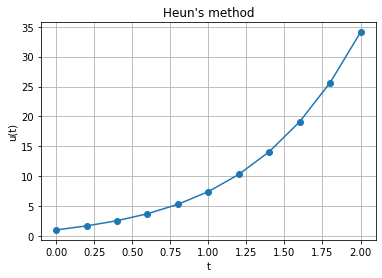

Heun's method


,t[k],u[k]
0,0.0,1.00000000000
1,0.2,1.67200000000
2,0.4,2.54224000000
3,0.6,3.70713280000
4,0.8,5.28430201600
5,1.0,7.41724845952
6,1.2,10.28104312061
7,1.4,14.08927260715
8,1.6,19.10251258072
9,1.8,25.63866534848


In [12]:
# Zapateriro page 254
def f1(t, y):
    return y + 3*t**2 + 2
    
# Burden page 286
def f2(t, y):
    return y - t**2 + 1

a = 0
b = 2
x0 = 1
n = 10
u = heun(f1, a, b, x0, n)

# plot
plt.plot(u[:, 0], u[:, 1], marker='o')
plt.xlabel("t")
plt.grid(True)
plt.ylabel("u(t)")
plt.title("Heun's method")
plt.show()

# print
print("Heun's method")
pd.set_option("display.precision", 11)
pd.DataFrame(u, range(len(u[:, 0])), ["t[k]", "u[k]"])

In [13]:
def runge_kutta_order2(f, a, b, x0, n):
    """
    To prove RK of order 2 we need the multivariable Taylor series and compare it to obtain coefficients
    x(a)=x(t0)=x0
    """
    u = np.zeros((n + 1, 2))
    u[:, 0] = np.linspace(a, b, n + 1)
    u[0, 1] = x0
    h = (b - a)/n

    for j in range(n):
        t, uj = u[j, 0], u[j, 1]

        K1 = h*f(t, uj)
        K2 = h*f(t + h, uj + K1)
        # Runge Kutta's method
        u[j + 1, 1] = uj + 1/2*(K1 + K2)
    return u

def runge_kutta_order3(f, a, b, x0, n):
    """
    x(a)=x(t0)=x0
    """
    u = np.zeros((n + 1, 2))
    u[:, 0] = np.linspace(a, b, n + 1)
    u[0, 1] = x0
    h = (b - a)/n

    for j in range(n):
        t, uj = u[j, 0], u[j, 1]

        K1 = h*f(t, uj)
        K2 = h*f(t + 1/2*h, uj + 1/2*K1)
        K3 = h*f(t + h, uj - K1 + 2*K2)
        # Runge Kutta's method
        u[j + 1, 1] = uj + 1/6*(K1 + 4*K2 + K3)
    return u

def runge_kutta_order4(f, a, b, x0, n):
    """
    x(a)=x(t0)=x0
    """
    u = np.zeros((n + 1, 2))
    u[:, 0] = np.linspace(a, b, n + 1)
    u[0, 1] = x0
    h = (b - a)/n

    for j in range(n):
        t, uj = u[j, 0], u[j, 1]

        K1 = h*f(t, uj)
        K2 = h*f(t + 1/2*h, uj + 1/2*K1)
        K3 = h*f(t + 1/2*h, uj + 1/2*K2)
        K4 = h*f(t + h, uj + K3)
        # Runge Kutta's method
        u[j + 1, 1] = uj + 1/6*(K1 + 2*K2 + 2*K3 + K4)
    return u

In [14]:
def rk2_vector(F, a, b, x0, n):
    """
    x0 = [t0, x0, y0] init value (x(t0), y(t0))
    """
    u = np.zeros((n + 1, len(x0)))
    u[0] = np.copy(x0)
    h = (b - a)/n
    for j in range(n):
        K1 = F(u[j])
        K2 = F(u[j] + h*K1)
        # Runge Kutta's method
        u[j + 1] = u[j] + 1/2*h*(K1 + K2)
    return u

def rk4_vector(F, a, b, x0, n):
    """
    x0 = [t0, x, y] init value (x(t0), y(t0))
    """
    u = np.zeros((n + 1, len(x0)))
    u[0] = np.copy(x0)
    h = (b - a)/n
    for i in range(n):
        K1 = F(u[i])
        K2 = F(u[i] + 1/2*h*K1)
        K3 = F(u[i] + 1/2*h*K2)
        K4 = F(u[i] + h*K3)
        # Runge Kutta's method
        u[i + 1] = u[i] + 1/6*h*(K1 + 2*K2 + 2*K3 + K4)
    return u

#### Session 14 System of ODE, page 9 (Observation: If it matches: order 2, 3, 4) 

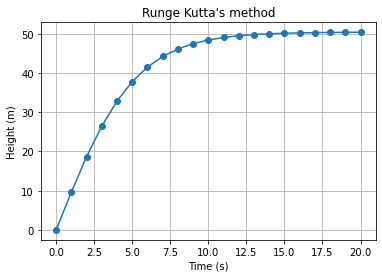

Runge Kutta order 4


,t[k],u[k],h(t[k]),error
0,0.0,0.00000000000,0.00000000000,0.00000000000
1,1.0,9.67824031423,9.67835888318,0.00011856895
2,2.0,18.66817353493,18.66845928837,0.00028575344
3,3.0,26.46428759645,26.46482163873,0.00053404228
4,4.0,32.83238576108,32.83321304385,0.00082728277
5,5.0,37.78461111168,37.78569729640,0.00108618472
6,6.0,41.49064290616,41.49188824754,0.00124534138
7,7.0,44.18513697519,44.18642131122,0.00128433603
8,8.0,46.10333792559,46.10455943390,0.00122150831
9,9.0,47.44851031774,47.44960275439,0.00109243665


In [17]:
def f_app(t, v):
    return -0.27/70*v**2 + 9.8

def v(t):
    a = 50.40576098761669
    alpha = 0.0038571428571428576
    return a*(1 - math.e**(-2*alpha*a*t))/(1 + math.e**(-2*alpha*a*t))

a = 0
b = 20
n = 20
y0 = 0

u = runge_kutta_order4(f_app, a, b, y0, n)

# add exact h(t) to u = [t, u(t)]
v_points = np.array([v(i) for i in u[:, 0]]).reshape(-1, 1)
u = np.append(u, v_points, axis=1)

# add error to u = [t, u(t), h(t)]
error = np.abs(u[:, 1] - u[:, 2]).reshape(-1, 1)
u = np.append(u, error, axis=1)

# plot
plt.plot(u[:, 0], u[:, 1], linestyle='-', marker='o')
plt.ylabel("Height (m)")
plt.xlabel("Time (s)")
plt.grid(True)
plt.title("Runge Kutta's method")
plt.show()

# print
print("Runge Kutta order 4")
pd.set_option("display.precision", 11)
pd.DataFrame(u, range(len(u[:, 0])), ["t[k]", "u[k]", "h(t[k])", "error"])

### Practica Calificada 4, Problema 2

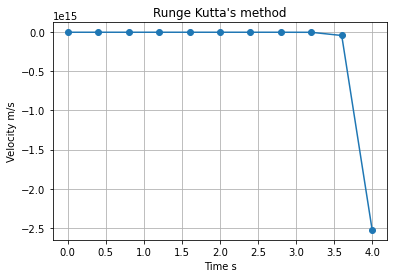

Runge Kutta order 4


,t[k],u[k]
0,0.0,1.00000000000e+00
1,0.4,7.60016969403e-01
2,0.8,-1.23884976193e+01
3,1.2,-8.03682177813e+02
4,1.6,-4.90542553693e+04
5,2.0,-2.99231619885e+06
6,2.4,-1.82531270684e+08
7,2.8,-1.11344074730e+10
8,3.2,-6.79198855799e+11
9,3.6,-4.14311302037e+13


In [19]:
def f(t, y):
    return 30*(math.cos(t) - y) + 3*math.sin(t)
 
a, b = 0, 4
y0 = 1
n = 10
u = runge_kutta_order2(f, a, b, y0, n)

# plot
plt.plot(u[:, 0], u[:, 1], linestyle='-', marker='o')
plt.ylabel("Velocity m/s")
plt.xlabel("Time s")
plt.title("Runge Kutta's method")
plt.grid(True)
plt.show()

# print
print("Runge Kutta order 4")
pd.set_option("display.precision", 11)
pd.DataFrame(u, range(len(u[:, 0])), ["t[k]", "u[k]"])

### Practica Calificada 4, Problema 3

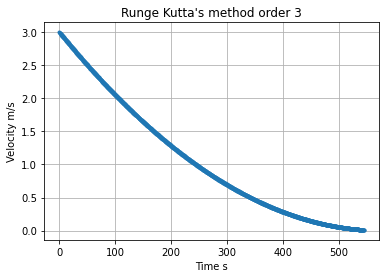

Runge Kutta order 3


,t[k],u[k],y(t[k]),error
0,0.0,3.00000000000,3.00000000000,4.44089209850e-16
1,0.5,2.99480609758,2.99480609758,2.81108469835e-13
2,1.0,2.98961669515,2.98961669515,5.63105118090e-13
3,1.5,2.98443179273,2.98443179273,8.45101766345e-13
4,2.0,2.97925139031,2.97925139031,1.12709841460e-12
...,...,...,...,...
1085,542.5,0.01093086867,0.01093087136,2.69782184960e-09
1086,543.0,0.01061946620,0.01061946894,2.73763149997e-09
1087,543.5,0.01031256374,0.01031256652,2.77862068250e-09
1088,544.0,0.01001016127,0.01001016410,2.82084279372e-09


In [34]:
def f(t, y):
    k = 0.006
    return -k*y**0.5

def y(t):
    k = 0.006
    return (3**0.5 - k/2*t)**2

k = 0.006
a, b = 0, 544.5
x0 = 3
n = 1089
u = runge_kutta_order3(f, a, b, x0, n)

# add exact y(t) to u = [t, u(t)]
y_points = np.array([y(i) for i in u[:, 0]]).reshape(-1, 1)
u = np.append(u, y_points, axis=1)

# add error to u = [t, u(t), h(t)]
error = np.abs(u[:, 1] - u[:, 2]).reshape(-1, 1)
u = np.append(u, error, axis=1)

# plot
plt.plot(u[:, 0], u[:, 1], marker='.')
plt.ylabel("Velocity m/s")
plt.xlabel("Time s")
plt.title("Runge Kutta's method order 3")
plt.grid(True)
plt.show()

# print
print("Runge Kutta order 3")
pd.set_option("display.precision", 11)
pd.DataFrame(u, range(len(u[:, 0])), ["t[k]", "u[k]", "y(t[k])", "error"])

### Practica Calificada 4, Problema 4

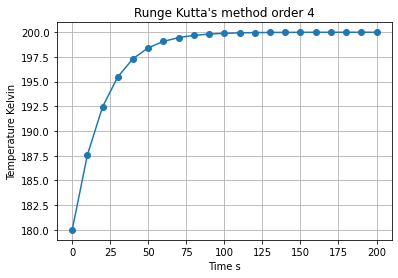

Runge Kutta order 4


,t[k],u[k]
0,0.0,180.000000
1,10.0,187.580417
2,20.0,192.460046
3,30.0,195.489657
4,40.0,197.326828
5,50.0,198.424599
6,60.0,199.074694
7,70.0,199.457616
8,80.0,199.682448
9,90.0,199.814211


In [32]:
eps = 5.6*1.0e-8    # constante de Bolzmann
gamma = 0.5         # constante de emisividad
S = 6       # area de la superficie
C = 100     # calor especifico      
Te = 200    # temperatura ambiente Kelvin
m = 1       # masa del cuerpo en kg

a = 0
b = 200
n = 20
T0 = 180

def dT(t, T):
    return -eps*gamma*S*(T**4 - Te**4)/(m*C)

u = runge_kutta_order4(dT, a, b, T0, n)

# plot
plt.plot(u[:, 0], u[:, 1], linestyle='-', marker='o')
plt.ylabel("Temperature Kelvin")
plt.xlabel("Time s")
plt.title("Runge Kutta's method order 4")
plt.grid(True)
plt.show()

# print
print("Runge Kutta order 4")
pd.set_option("display.precision", 6)
pd.DataFrame(u, range(len(u[:, 0])), ["t[k]", "u[k]"])

### Session 15 System of ODE, page 13

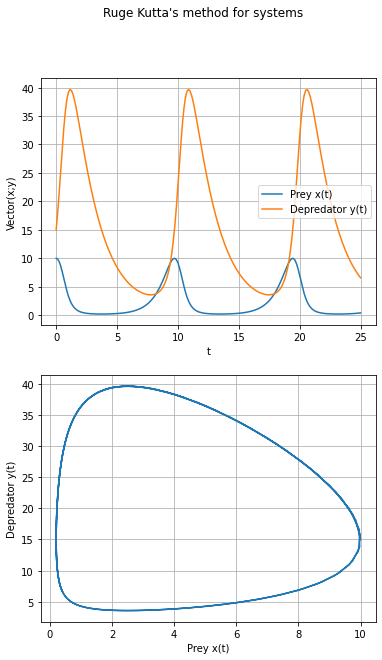

Runge Kutta order 4


,t[k],x(t[k]),y(t[k])
0,0.000,10.0000000000,15.0000000000
1,0.125,9.8518008705,18.0713248562
2,0.250,9.3895636705,21.6067227069
3,0.375,8.6237356298,25.4382439442
4,0.500,7.6198921964,29.2884349707
...,...,...,...
196,24.500,0.2979980228,8.1547249489
197,24.625,0.3198130641,7.7199982949
198,24.750,0.3446727348,7.3127070366
199,24.875,0.3729317766,6.9314990130


In [35]:
def F(x):
    """
    x = [t, x(t), y(t)]
    """
    dt = 1
    dx = 1.2*x[1] - 0.08*x[1]*x[2]
    dy = 0.2*x[1]*x[2] - 0.5*x[2]
    return np.array([dt, dx, dy])
    
# Euler for system of differential equations
# x0 = x(t0) = [0, 10, 15]
a = 0
b = 25
n = 200
x0 = np.array([a, 10, 15])
u = rk4_vector(F, a, b, x0, n)

# plot
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(10)
fig.suptitle("Ruge Kutta's method for systems")

ax1.plot(u[:, 0], u[:, 1])
ax1.plot(u[:, 0], u[:, 2])
ax1.grid(True)
ax1.set_xlabel("t")
ax1.set_ylabel("Vector(x;y)")
ax1.legend(("Prey x(t)", "Depredator y(t)"))

ax2.plot(u[:, 1], u[:, 2])
ax2.grid(True)
ax2.set_xlabel("Prey x(t)")
ax2.set_ylabel("Depredator y(t)")
plt.show()

# print
print("Runge Kutta order 4")
pd.set_option("display.precision", 10)
pd.DataFrame(u, range(len(u[:, 0])), ["t[k]", "x(t[k])", "y(t[k])"])

#### Session 15 System of ODE, page 17, (Observation: Does not match) 
#### Zapateiro page 272, Example 6.7.1, (Observation: If it matches) 

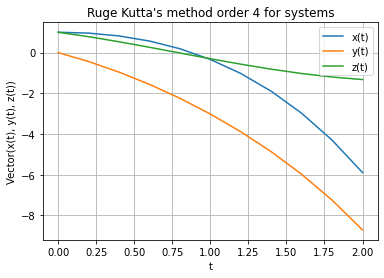

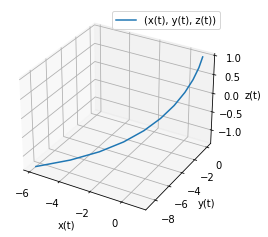

Runge Kutta order 4


,t[k],x(t[k]),y(t[k]),z(t[k])
0,0.0,1.000000000000,0.000000000000,1.000000000000
1,0.2,0.957328775518,-0.439998867473,0.781404013542
2,0.4,0.818647495645,-0.960166703771,0.531658266782
3,0.6,0.567851350522,-1.561399860708,0.260719395872
4,0.8,0.188515367576,-2.246152633695,-0.020611025157
5,1.0,-0.336511251865,-3.019399865608,-0.301117083683
6,1.2,-1.025716648320,-3.889733852245,-0.569615642088
7,1.4,-1.899771276293,-4.870603802541,-0.815402140382
8,1.6,-2.982636139061,-5.981711932643,-1.028677314731
9,1.8,-4.302967654423,-7.250588085786,-1.200937819349


In [38]:
def F(x):
    """
    x = [t, x(t), y(t)]
    """
    dt = 1
    dx = x[2]
    dy = -x[1] - 2*np.e**x[0] + 1
    dz = -x[1] - np.e**x[0] + 1
    return np.array([dt, dx, dy, dz])
    
# Euler for system of differential equations
a = 0
b = 2
n = 10
x0 = np.array([a, 1, 0, 1.0])
u = rk4_vector(F, a, b, x0, n)

# Graphic
plt.title("Ruge Kutta's method order 4 for systems")

plt.plot(u[:, 0], u[:, 1])
plt.plot(u[:, 0], u[:, 2])
plt.plot(u[:, 0], u[:, 3])
plt.grid(True)
plt.xlabel("t")
plt.ylabel("Vector(x(t), y(t), z(t))")
plt.legend(("x(t)", "y(t)", "z(t)"))

fig = plt.figure()
ax2 = fig.gca(projection='3d')
ax2.plot(u[:, 1], u[:, 2], u[:, 3])
ax2.set_xlabel("x(t)")
ax2.set_ylabel("y(t)")
ax2.set_zlabel("z(t)")
ax2.legend(('(x(t), y(t), z(t))', ))
plt.show()

# print
print("Runge Kutta order 4")
pd.set_option("display.precision", 12)
pd.DataFrame(u, range(len(u[:, 0])), ["t[k]", "x(t[k])", "y(t[k])", "z(t[k])"])

### Higher Order Differential Equation 
\begin{align*}
    y''-2y'+y=te^t - t, 0 \le t \le 1, y(0) = y'(0) = 0
\end{align*}
$u_1(t)=y(t), u_2(t)=y'(t)$
\begin{align*}
    u'_1(t)&=u_2(t)\\
    u'_2(t)&=te^t - t + 2u_2(t) - u_1(t)
\end{align*}

#### Session 15 System of ODE, page 13 (Observation: Does not match) 
#### Zapateiro page 274, Example 6.8.1 (Observation: If it matches) 

Higher Order Differential Equation
Runge Kutta's method order 4


,t[k],y(t[k]),y'(t[k])
0,0.0,0.000000000,0.000000000
1,0.1,0.000008972,0.000363920
2,0.2,0.000153519,0.003178822
3,0.3,0.000834268,0.011719085
4,0.4,0.002832055,0.030353253
5,0.5,0.007429678,0.064798388
6,0.6,0.016561490,0.122423745
7,0.7,0.032996171,0.212612330
8,0.8,0.060558963,0.347190281
9,0.9,0.104400702,0.540935589


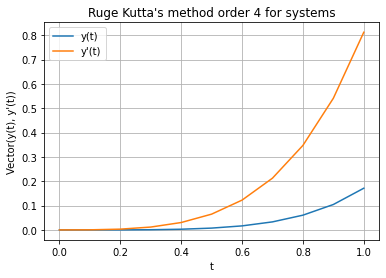

In [45]:
def F(u):
    """
    x = [t, x(t), y(t)]
    """
    dt = 1
    du_1 = u[2]
    du_2 = u[0]*np.e**u[0] - u[0] + 2*u[2] - u[1]
    return np.array([dt, du_1, du_2])
    
# Euler for system of differential equations
# x0 = x(t0) = [0, 0, 0]
a, b = 0, 1
n = 10
u0 = np.array([a, 0, 0])
u = rk4_vector(F, a, b, u0, n)

# plot
plt.title("Ruge Kutta's method order 4 for systems")
plt.plot(u[:, 0], u[:, 1])
plt.plot(u[:, 0], u[:, 2])
plt.xlabel("t")
plt.ylabel("Vector(y(t), y'(t))")
plt.legend(("y(t)", "y'(t)"))
plt.grid(True)
plt.plot()

# print
print("""Higher Order Differential Equation
Runge Kutta's method order 4""")
pd.set_option("display.precision", 9)
pd.DataFrame(u, range(len(u[:, 0])), ["t[k]", "y(t[k])", "y'(t[k])"])